## Data

In [28]:
## Read Data
df = read.csv('Market_Basket_Optimisation.csv', header = FALSE)
head(df)
dim(df)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
burgers,meatballs,eggs,,,,,,,,,,,,,,,,,
chutney,,,,,,,,,,,,,,,,,,,
turkey,avocado,,,,,,,,,,,,,,,,,,
mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,
low fat yogurt,,,,,,,,,,,,,,,,,,,


[1] 7501   20

In [30]:
## Read Transactions
library(arules)
df = read.transactions('Market_Basket_Optimisation.csv', 
                       sep = ',', rm.duplicates = TRUE)
summary(df)

distribution of transactions with duplicates:
1 
5 


transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.033 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     2.0     3.0     3.9     5.0    20.0 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

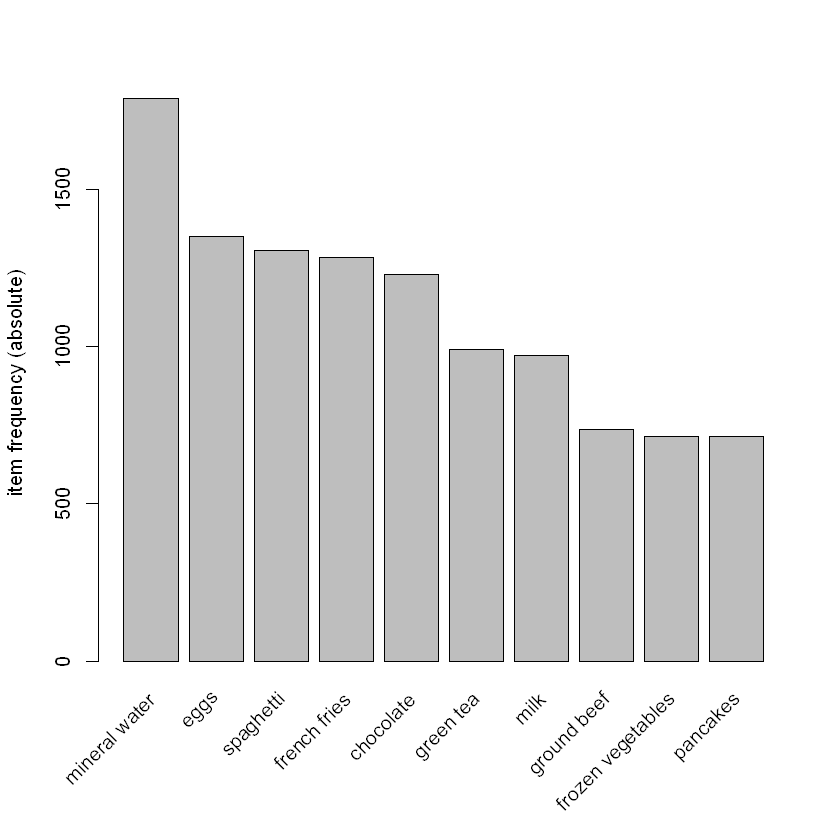

In [36]:
# Display top 10 items
itemFrequencyPlot(df, topN = 10, type='absolute')

## 1. Apriori

In [37]:
# Train Apriori to the Data
rules = apriori(data = df, parameter = list(support = 0.004, 
                                            confidence = 0.2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   0.004      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 30 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [114 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [811 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [38]:
summary(rules)

set of 811 rules

rule length distribution (lhs + rhs):sizes
  1   2   3   4 
  1 250 528  32 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     2.0     3.0     2.7     3.0     4.0 

summary of quality measures:
    support        confidence        lift         count     
 Min.   :0.004   Min.   :0.20   Min.   :0.9   Min.   :  31  
 1st Qu.:0.005   1st Qu.:0.24   1st Qu.:1.5   1st Qu.:  37  
 Median :0.006   Median :0.29   Median :1.8   Median :  46  
 Mean   :0.009   Mean   :0.31   Mean   :1.9   Mean   :  68  
 3rd Qu.:0.009   3rd Qu.:0.36   3rd Qu.:2.2   3rd Qu.:  67  
 Max.   :0.238   Max.   :0.63   Max.   :4.8   Max.   :1788  

mining info:
 data ntransactions support confidence
   df          7501   0.004        0.2

In [19]:
# show Top 10 results
options(digits=2)
inspect(sort(rules, by = 'lift')[1:10])

     lhs                       rhs             support confidence lift count
[1]  {light cream}          => {chicken}        0.0045       0.29  4.8    34
[2]  {pasta}                => {escalope}       0.0059       0.37  4.7    44
[3]  {pasta}                => {shrimp}         0.0051       0.32  4.5    38
[4]  {eggs,                                                                 
      ground beef}          => {herb & pepper}  0.0041       0.21  4.2    31
[5]  {whole wheat pasta}    => {olive oil}      0.0080       0.27  4.1    60
[6]  {herb & pepper,                                                        
      spaghetti}            => {ground beef}    0.0064       0.39  4.0    48
[7]  {herb & pepper,                                                        
      mineral water}        => {ground beef}    0.0067       0.39  4.0    50
[8]  {tomato sauce}         => {ground beef}    0.0053       0.38  3.8    40
[9]  {mushroom cream sauce} => {escalope}       0.0057       0.30  3.8    43

In [39]:
# sort by the most likely rules
inspect(sort(rules, by = 'confidence')[1:10])

     lhs                              rhs             support confidence lift
[1]  {frozen vegetables,soup}      => {mineral water} 0.0051  0.63       2.7 
[2]  {pancakes,soup}               => {mineral water} 0.0043  0.63       2.6 
[3]  {olive oil,tomatoes}          => {spaghetti}     0.0044  0.61       3.5 
[4]  {pancakes,whole wheat rice}   => {mineral water} 0.0041  0.60       2.5 
[5]  {cooking oil,pancakes}        => {mineral water} 0.0047  0.59       2.5 
[6]  {olive oil,soup}              => {mineral water} 0.0052  0.58       2.4 
[7]  {frozen vegetables,olive oil} => {mineral water} 0.0065  0.58       2.4 
[8]  {olive oil,tomatoes}          => {mineral water} 0.0041  0.57       2.4 
[9]  {cooking oil,ground beef}     => {spaghetti}     0.0048  0.57       3.3 
[10] {milk,soup}                   => {mineral water} 0.0085  0.56       2.4 
     count
[1]  38   
[2]  32   
[3]  33   
[4]  31   
[5]  35   
[6]  39   
[7]  49   
[8]  31   
[9]  36   
[10] 64   


In [50]:
# target items
rules<-apriori(data=df, parameter=list(supp=0.004,conf = 0.2, minlen=2), 
               appearance = list(default="lhs",rhs='mineral water'),
               control = list(verbose=F))
rules<-sort(rules, decreasing=TRUE,by='confidence')
inspect(rules[1:10])

     lhs                              rhs             support confidence lift
[1]  {frozen vegetables,soup}      => {mineral water} 0.0051  0.63       2.7 
[2]  {pancakes,soup}               => {mineral water} 0.0043  0.63       2.6 
[3]  {pancakes,whole wheat rice}   => {mineral water} 0.0041  0.60       2.5 
[4]  {cooking oil,pancakes}        => {mineral water} 0.0047  0.59       2.5 
[5]  {olive oil,soup}              => {mineral water} 0.0052  0.58       2.4 
[6]  {frozen vegetables,olive oil} => {mineral water} 0.0065  0.58       2.4 
[7]  {olive oil,tomatoes}          => {mineral water} 0.0041  0.57       2.4 
[8]  {milk,soup}                   => {mineral water} 0.0085  0.56       2.4 
[9]  {olive oil,shrimp}            => {mineral water} 0.0045  0.56       2.3 
[10] {chocolate,soup}              => {mineral water} 0.0056  0.55       2.3 
     count
[1]  38   
[2]  32   
[3]  31   
[4]  35   
[5]  39   
[6]  49   
[7]  31   
[8]  64   
[9]  34   
[10] 42   


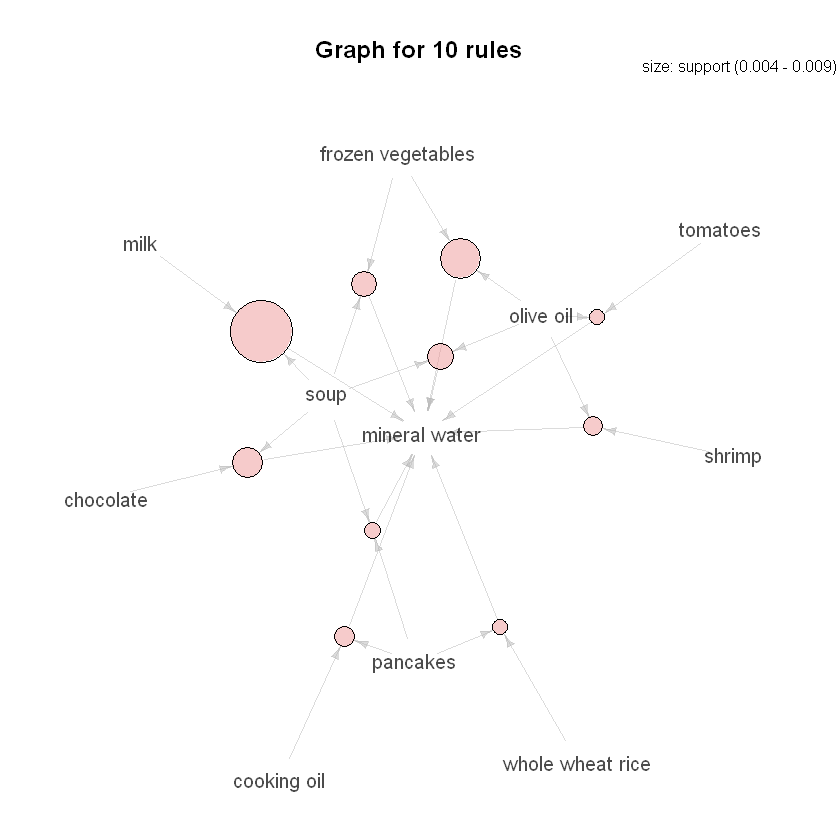

In [51]:
library(arulesViz)
plot(rules[1:10],method='graph',shading=NA)

## 2. Eclat

In [53]:
# Training Eclat to the Data
rules = eclat(data = df, parameter = list(support = 0.003, minlen = 2))

Eclat

parameter specification:
 tidLists support minlen maxlen            target   ext
    FALSE   0.003      2     10 frequent itemsets FALSE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 22 

create itemset ... 
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating sparse bit matrix ... [115 row(s), 7501 column(s)] done [0.00s].
writing  ... [1328 set(s)] done [0.01s].
Creating S4 object  ... done [0.00s].


In [54]:
# Visualize Top 10 results
inspect(sort(rules, by = 'support')[1:10])

     items                             support count
[1]  {mineral water,spaghetti}         0.060   448  
[2]  {chocolate,mineral water}         0.053   395  
[3]  {eggs,mineral water}              0.051   382  
[4]  {milk,mineral water}              0.048   360  
[5]  {ground beef,mineral water}       0.041   307  
[6]  {ground beef,spaghetti}           0.039   294  
[7]  {chocolate,spaghetti}             0.039   294  
[8]  {eggs,spaghetti}                  0.037   274  
[9]  {eggs,french fries}               0.036   273  
[10] {frozen vegetables,mineral water} 0.036   268  


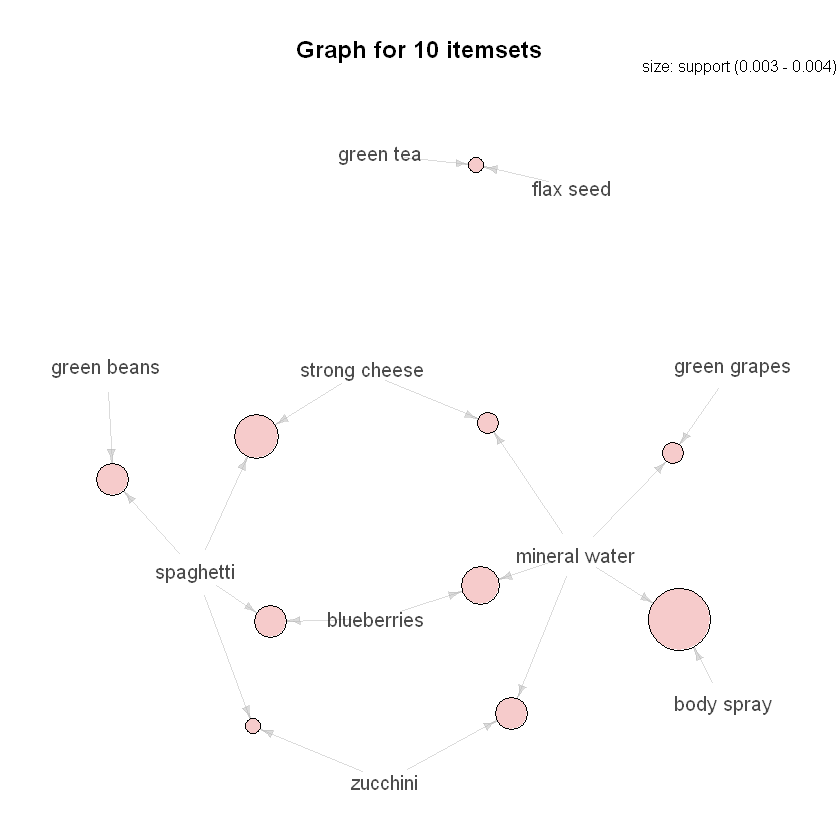

In [55]:
library(arulesViz)
plot(rules[1:10],method='graph',shading=NA)